# 1. Este notebook buscar relacionar dados referente *`Distribuição de gênero por nível de cargo`*.

## 1.1 Este bloco realiza a importação do arquivo ***'.csv'*** e depois exibe todos os nomes das colunas para uma melhor visualização.

In [5]:
import pandas as pd
from sqlalchemy import create_engine

caminho_banco = "../../sqlite/database/stateOfDataBR2023.db"
conn = create_engine(f'sqlite:///{caminho_banco}')

query = """
SELECT * FROM dados;
"""

df = pd.read_sql(query, conn)

for i, col in enumerate(df.columns):
    print(f'{i}: {col}')


0: (P0-_id)
1: (P1_a_-_Idade)
2: (P1_a_1_-_Faixa_idade)
3: (P1_b_-_Genero)
4: (P1_c_-_Cor/raca/etnia)
5: (P1_d_-_PCD)
6: (P1_e_-_experiencia_profissional_prejudicada)
7: (P1_e_1_-_Nao_acredito_que_minha_experiencia_profissional_seja_afetada)
8: (P1_e_2_-_Experiencia_prejudicada_devido_a_minha_Cor_Raca_Etnia)
9: (P1_e_3_-_Experiencia_prejudicada_devido_a_minha_identidade_de_genero)
10: (P1_e_4_-_Experiencia_prejudicada_devido_ao_fato_de_ser_PCD)
11: (P1_f_-_aspectos_prejudicados)
12: (P1_f_1-_Quantidade_de_oportunidades_de_emprego/vagas_recebidas)
13: (P1_f_2-_Senioridade_das_vagas_recebidas_em_relacao_a_sua_experiencia)
14: (P1_f_3-_Aprovacao_em_processos_seletivos/entrevistas)
15: (P1_f_4-_Oportunidades_de_progressao_de_carreira)
16: (P1_f_5-_Velocidade_de_progressao_de_carreira)
17: (P1_f_6-_Nivel_de_cobranca_no_trabalho/Stress_no_trabalho)
18: (P1_f_7-_Atencao_dada_diante_das_minhas_opinioes_e_ideias)
19: (P1_f_8-_Relacao_com_outros_membros_da_empresa-_em_momentos_de_trabalho)
20: (

## 1.2 Este bloco aplica filtros que atendem aos critérios específicos, mantendo apenas as colunas de interesse. Depois agrupa por *`nível`*, *`gênero`*, soma os totais e por fim cria uma nova coluna com os valores percentuais de cada gênero.

In [6]:
def calcular_valor_coluna(merged):
  merged['total_percentual'] = (merged['total'] / merged['total_nivel']) * 100
  return merged



#   O código cria um novo DataFrame chamado 'consulta' que contém apenas as linhas que atendem aos critérios
#  de filtragem especificados, mantendo apenas as colunas de interesse.
consulta = df[
    # (df['(P1_b_-_Genero)'] == 'Feminino') &
    df['(P1_b_-_Genero)'].isin(['Feminino', 'Masculino', 'Prefiro nao informar', 'Outro']) &
    (df['(P2_g_-_Nivel)'].notna()) &
    (df['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado, buscando recolocacao')) &
    (df['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Desempregado e nao estou buscando recolocacao')) &
    (df['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Somente Estudante (graduacao)')) &
    (df['(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'].ne('Prefiro nao informar'))
    ][
        ['(P1_b_-_Genero)',
         '(P2_g_-_Nivel)',
         '(P2_a_-_Qual_sua_situacao_atual_de_trabalho?)'
     ]]


# Agrupando por nível e gênero e somando os totais
genero_por_cargo = consulta.groupby('(P2_g_-_Nivel)')['(P1_b_-_Genero)'].value_counts().reset_index(name='total')


# Calculando o total por nível
totais_por_nivel = genero_por_cargo.groupby('(P2_g_-_Nivel)')['total'].sum().reset_index()
totais_por_nivel.rename(columns={'total': 'total_nivel'}, inplace=True)

# Juntando os totais por nível com o DataFrame agrupado
merged = pd.merge(genero_por_cargo, totais_por_nivel, on='(P2_g_-_Nivel)')

# Calculando a porcentagem
calcular_valor_coluna(merged)


,(P2_g_-_Nivel),(P1_b_-_Genero),total,total_nivel,total_percentual
0,Junior,Masculino,740,1042,71.017274
1,Junior,Feminino,298,1042,28.598848
2,Junior,Prefiro nao informar,3,1042,0.287908
3,Junior,Outro,1,1042,0.095969
4,Pleno,Masculino,1046,1389,75.305976
5,Pleno,Feminino,335,1389,24.118071
6,Pleno,Outro,4,1389,0.287977
7,Pleno,Prefiro nao informar,4,1389,0.287977
8,Senior,Masculino,1106,1419,77.942213
9,Senior,Feminino,307,1419,21.634954


### 1.2.1 Este bloco exibe a tabela *`merged`* com os dados necessário para gerar o gráfico.

In [3]:
# Exibindo o resultado final
print(merged[['(P2_g_-_Nivel)', '(P1_b_-_Genero)', 'total', 'total_percentual']])

   (P2_g_-_Nivel)       (P1_b_-_Genero)  total  total_percentual
0          Junior             Masculino    740         71.017274
1          Junior              Feminino    298         28.598848
2          Junior  Prefiro nao informar      3          0.287908
3          Junior                 Outro      1          0.095969
4           Pleno             Masculino   1046         75.305976
5           Pleno              Feminino    335         24.118071
6           Pleno                 Outro      4          0.287977
7           Pleno  Prefiro nao informar      4          0.287977
8          Senior             Masculino   1106         77.942213
9          Senior              Feminino    307         21.634954
10         Senior  Prefiro nao informar      4          0.281889
11         Senior                 Outro      2          0.140944


# 2. Gráfico gerado a partir dos dados.

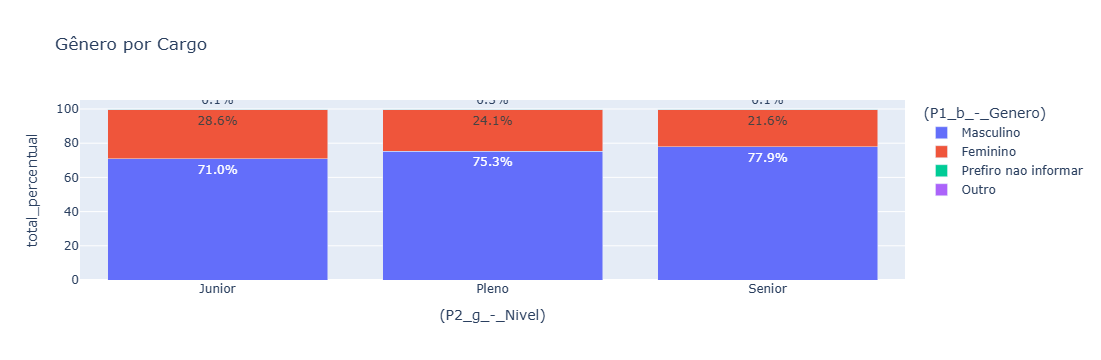

In [7]:
from inspect import stack
import plotly.express as px


grafico = px.bar(merged, 
                 x='(P2_g_-_Nivel)', 
                 y='total_percentual', 
                 color='(P1_b_-_Genero)', 
                 title='Gênero por Cargo', 
                 barmode='stack',
                text='total_percentual'
                )


# Adicionando rótulos de texto
grafico.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
grafico.show()